In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics # Import scikit-learn metrics module for accuracy calculation

In [36]:
data = pd.read_csv("C:/Users/xinji/Documents/2023 Spring/CS 5630/Final Project/SanFrancisco.csv", index_col=0)
data

,Dates,Category,DayOfWeek,PdDistrict,Address,X,Y,year,month,day,hour,violent,street1,street2,str1,str2
0,2015-05-13 23:53:00,WARRANTS,2,NORTHERN,OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,13,23,True,OAK ST,LAGUNA ST,OAK ST,LAGUNA ST
1,2015-05-13 23:53:00,OTHER OFFENSES,2,NORTHERN,OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,13,23,False,OAK ST,LAGUNA ST,OAK ST,LAGUNA ST
2,2015-05-13 23:33:00,OTHER OFFENSES,2,NORTHERN,VANNESS AV / GREENWICH ST,-122.424363,37.800414,2015,5,13,23,False,VANNESS AV,GREENWICH ST,VANNESS AV,GREENWICH ST
3,2015-05-13 23:30:00,LARCENY/THEFT,2,NORTHERN,1500 Block of LOMBARD ST,-122.426995,37.800873,2015,5,13,23,False,1500 Block of LOMBARD ST,NaN,other,other
4,2015-05-13 23:30:00,LARCENY/THEFT,2,PARK,100 Block of BRODERICK ST,-122.438738,37.771541,2015,5,13,23,False,100 Block of BRODERICK ST,NaN,other,other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
878044,2003-01-06 00:15:00,ROBBERY,0,TARAVAL,FARALLONES ST / CAPITOL AV,-122.459033,37.714056,2003,1,6,0,True,FARALLONES ST,CAPITOL AV,other,CAPITOL AV
878045,2003-01-06 00:01:00,LARCENY/THEFT,0,INGLESIDE,600 Block of EDNA ST,-122.447364,37.731948,2003,1,6,0,False,600 Block of EDNA ST,NaN,other,other
878046,2003-01-06 00:01:00,LARCENY/THEFT,0,SOUTHERN,5TH ST / FOLSOM ST,-122.403390,37.780266,2003,1,6,0,False,5TH ST,FOLSOM ST,5TH ST,FOLSOM ST
878047,2003-01-06 00:01:00,VANDALISM,0,SOUTHERN,TOWNSEND ST / 2ND ST,-122.390531,37.780607,2003,1,6,0,True,TOWNSEND ST,2ND ST,other,2ND ST


# Neural Network (Simple Set of Predictors)

In [37]:
data1 = pd.get_dummies(data.drop(columns = ["Dates", "Category", "Address", "street1", "street2", "PdDistrict", "str1", "str2"]))
data1

,DayOfWeek,X,Y,year,month,day,hour,violent
0,2,-122.425892,37.774599,2015,5,13,23,True
1,2,-122.425892,37.774599,2015,5,13,23,False
2,2,-122.424363,37.800414,2015,5,13,23,False
3,2,-122.426995,37.800873,2015,5,13,23,False
4,2,-122.438738,37.771541,2015,5,13,23,False
...,...,...,...,...,...,...,...,...
878044,0,-122.459033,37.714056,2003,1,6,0,True
878045,0,-122.447364,37.731948,2003,1,6,0,False
878046,0,-122.403390,37.780266,2003,1,6,0,False
878047,0,-122.390531,37.780607,2003,1,6,0,True


In [38]:
data1["PdDistrict"] = data["PdDistrict"].map({d:i for i, d in enumerate(data["PdDistrict"].drop_duplicates())})

In [39]:
X1 = data1.loc[:, data1.columns != 'violent']
y1 = data1.violent

In [40]:
# min-max normalization
scaler = MinMaxScaler()
# Fit and transform in one step
normalized1 = scaler.fit_transform(X1)

# Split dataset into 70% training set and 30% test set
X_train1, X_test1, y_train1, y_test1 = train_test_split(normalized1, y1, test_size=0.3, random_state=1) 

In [41]:
NN = tf.keras.Sequential([
    tf.keras.layers.Dense(64, input_shape=(X_train1.shape[1],), activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [42]:
#kernel_regularizer=tf.keras.regularizers.L1(0.1)

In [43]:
NN.compile(optimizer='adam',
           loss='binary_crossentropy',
           metrics=['accuracy'])

In [44]:
NN.fit(X_train1, y_train1, epochs=10)

Epoch 1/10
19206/19206 [==============================] - 35s 2ms/step - loss: 0.6860 - accuracy: 0.5473
Epoch 2/10
19206/19206 [==============================] - 35s 2ms/step - loss: 0.6835 - accuracy: 0.5570
Epoch 3/10
19206/19206 [==============================] - 35s 2ms/step - loss: 0.6818 - accuracy: 0.5621
Epoch 4/10
19206/19206 [==============================] - 32s 2ms/step - loss: 0.6813 - accuracy: 0.5634
Epoch 5/10
19206/19206 [==============================] - 37s 2ms/step - loss: 0.6809 - accuracy: 0.5645
Epoch 6/10
19206/19206 [==============================] - 33s 2ms/step - loss: 0.6806 - accuracy: 0.5655
Epoch 7/10
19206/19206 [==============================] - 33s 2ms/step - loss: 0.6804 - accuracy: 0.5657
Epoch 8/10
19206/19206 [==============================] - 33s 2ms/step - loss: 0.6801 - accuracy: 0.5665
Epoch 9/10
19206/19206 [==============================] - 34s 2ms/step - loss: 0.6799 - accuracy: 0.5671
Epoch 10/10
19206/19206 [==============================

In [45]:
# Predict the response for train dataset
y_pred_nn11 = np.round(NN.predict(X_train1), 0)

# Model Accuracy, Sensitivity, Specificity, Kappa
print("Accuracy of neural network model 1:", metrics.accuracy_score(y_train1, y_pred_nn11))
print("Sensitivity of neural network model 1:", metrics.recall_score(y_train1, y_pred_nn11))
print("Specificity of neural network model 1:", metrics.recall_score(y_train1, y_pred_nn11, pos_label=0))
print("Kappa of neural network model 1:", metrics.cohen_kappa_score(y_train1, y_pred_nn11))

19206/19206 [==============================] - 22s 1ms/step
Accuracy of neural network model 1: 0.5703732750611387
Sensitivity of neural network model 1: 0.5676910512642437
Specificity of neural network model 1: 0.5731212797006302
Kappa of neural network model 1: 0.140785315627302


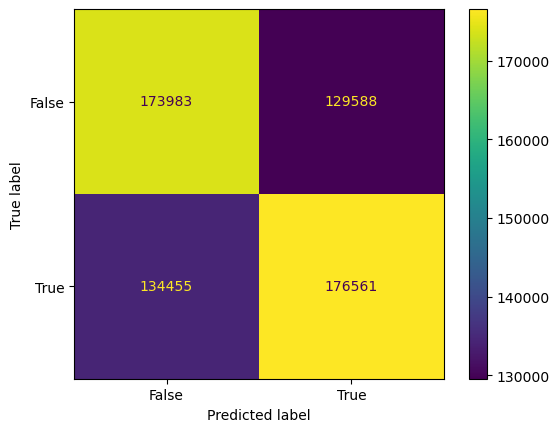

In [46]:
# Confusion matrix for train dataset
confusion_matrix11 = metrics.confusion_matrix(y_train1, y_pred_nn11)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix11, 
                                            display_labels = [False, True])

cm_display.plot()
plt.show()

In [47]:
# Predict the response for test dataset
y_pred_nn1 = np.round(NN.predict(X_test1), 0)

# Model Accuracy, Sensitivity, Specificity, Kappa
print("Accuracy of neural network model 1:", metrics.accuracy_score(y_test1, y_pred_nn1))
print("Sensitivity of neural network model 1:", metrics.recall_score(y_test1, y_pred_nn1))
print("Specificity of neural network model 1:", metrics.recall_score(y_test1, y_pred_nn1, pos_label=0))
print("Kappa of neural network model 1:", metrics.cohen_kappa_score(y_test1, y_pred_nn1))

8232/8232 [==============================] - 10s 1ms/step
Accuracy of neural network model 1: 0.57013231078798
Sensitivity of neural network model 1: 0.5660836490513484
Specificity of neural network model 1: 0.5742970031655075
Kappa of neural network model 1: 0.14034028391691955


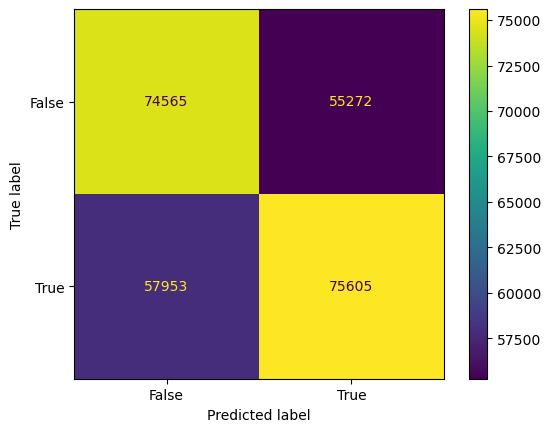

In [48]:
# Confusion matrix for test dataset
confusion_matrix1 = metrics.confusion_matrix(y_test1, y_pred_nn1)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix1, 
                                            display_labels = [False, True])

cm_display.plot()
plt.show()

# Neural Network (with PdDistrict)

In [49]:
data2 = pd.get_dummies(data.drop(columns = ["Dates", "Category", "Address", "street1", "street2", "str1", "str2"]))
data2

,DayOfWeek,X,Y,year,month,day,hour,violent,PdDistrict_BAYVIEW,PdDistrict_CENTRAL,PdDistrict_INGLESIDE,PdDistrict_MISSION,PdDistrict_NORTHERN,PdDistrict_PARK,PdDistrict_RICHMOND,PdDistrict_SOUTHERN,PdDistrict_TARAVAL,PdDistrict_TENDERLOIN
0,2,-122.425892,37.774599,2015,5,13,23,True,0,0,0,0,1,0,0,0,0,0
1,2,-122.425892,37.774599,2015,5,13,23,False,0,0,0,0,1,0,0,0,0,0
2,2,-122.424363,37.800414,2015,5,13,23,False,0,0,0,0,1,0,0,0,0,0
3,2,-122.426995,37.800873,2015,5,13,23,False,0,0,0,0,1,0,0,0,0,0
4,2,-122.438738,37.771541,2015,5,13,23,False,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
878044,0,-122.459033,37.714056,2003,1,6,0,True,0,0,0,0,0,0,0,0,1,0
878045,0,-122.447364,37.731948,2003,1,6,0,False,0,0,1,0,0,0,0,0,0,0
878046,0,-122.403390,37.780266,2003,1,6,0,False,0,0,0,0,0,0,0,1,0,0
878047,0,-122.390531,37.780607,2003,1,6,0,True,0,0,0,0,0,0,0,1,0,0


In [50]:
X2 = data2.loc[:, data2.columns != 'violent']
y2 = data2.violent

In [51]:
# min-max normalization
scaler = MinMaxScaler()
# Fit and transform in one step
normalized2 = scaler.fit_transform(X2)

# Split dataset into 70% training set and 30% test set
X_train2, X_test2, y_train2, y_test2 = train_test_split(normalized2, y2, test_size=0.3, random_state=1) 

In [52]:
NN = tf.keras.Sequential([
    tf.keras.layers.Dense(64, input_shape=(X_train2.shape[1],), activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [53]:
NN.compile(optimizer='adam',
           loss='binary_crossentropy',
           metrics=['accuracy'])

In [54]:
NN.fit(X_train2, y_train2, epochs=10)

Epoch 1/10
19206/19206 [==============================] - 31s 2ms/step - loss: 0.6835 - accuracy: 0.5582
Epoch 2/10
19206/19206 [==============================] - 28s 1ms/step - loss: 0.6824 - accuracy: 0.5605
Epoch 3/10
19206/19206 [==============================] - 32s 2ms/step - loss: 0.6819 - accuracy: 0.5617
Epoch 4/10
19206/19206 [==============================] - 33s 2ms/step - loss: 0.6815 - accuracy: 0.5632
Epoch 5/10
19206/19206 [==============================] - 34s 2ms/step - loss: 0.6812 - accuracy: 0.5638
Epoch 6/10
19206/19206 [==============================] - 36s 2ms/step - loss: 0.6808 - accuracy: 0.5648
Epoch 7/10
19206/19206 [==============================] - 37s 2ms/step - loss: 0.6805 - accuracy: 0.5658
Epoch 8/10
19206/19206 [==============================] - 35s 2ms/step - loss: 0.6802 - accuracy: 0.5661
Epoch 9/10
19206/19206 [==============================] - 34s 2ms/step - loss: 0.6799 - accuracy: 0.5665
Epoch 10/10
19206/19206 [==============================

In [55]:
# Predict the response for train dataset
y_pred_nn22 = np.round(NN.predict(X_train2), 0)

# Model Accuracy, Sensitivity, Specificity, Kappa
print("Accuracy of neural network model 2:", metrics.accuracy_score(y_train2, y_pred_nn22))
print("Sensitivity of neural network model 2:", metrics.recall_score(y_train2, y_pred_nn22))
print("Specificity of neural network model 2:", metrics.recall_score(y_train2, y_pred_nn22, pos_label=0))
print("Kappa of neural network model 2:", metrics.cohen_kappa_score(y_train2, y_pred_nn22))

19206/19206 [==============================] - 21s 1ms/step
Accuracy of neural network model 2: 0.5685736925772917
Sensitivity of neural network model 2: 0.6066279548319058
Specificity of neural network model 2: 0.5295861594157545
Kappa of neural network model 2: 0.13632407777548528


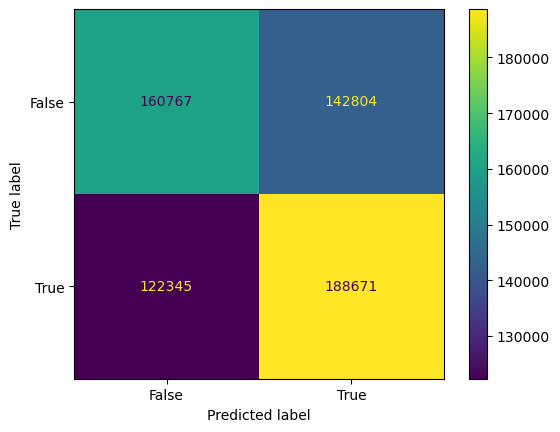

In [56]:
# Confusion matrix for train dataset
confusion_matrix22 = metrics.confusion_matrix(y_train2, y_pred_nn22)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix22, 
                                            display_labels = [False, True])

cm_display.plot(values_format='')
plt.show()

In [57]:
# Predict the response for test dataset
y_pred_nn2 = np.round(NN.predict(X_test2), 0)

# Model Accuracy, Sensitivity, Specificity, Kappa
print("Accuracy of neural network model 2:", metrics.accuracy_score(y_test2, y_pred_nn2))
print("Sensitivity of neural network model 2:", metrics.recall_score(y_test2, y_pred_nn2))
print("Specificity of neural network model 2:", metrics.recall_score(y_test2, y_pred_nn2, pos_label=0))
print("Kappa of neural network model 2:", metrics.cohen_kappa_score(y_test2, y_pred_nn2))

8232/8232 [==============================] - 10s 1ms/step
Accuracy of neural network model 2: 0.5694830957307466
Sensitivity of neural network model 2: 0.6054972371553932
Specificity of neural network model 2: 0.5324368246339641
Kappa of neural network model 2: 0.1380528224588654


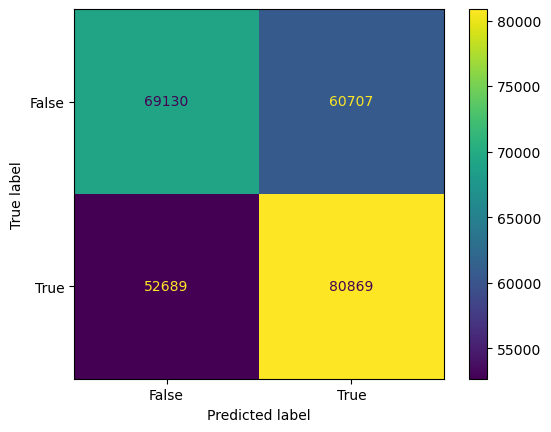

In [58]:
# Confusion matrix for test dataset
confusion_matrix2 = metrics.confusion_matrix(y_test2, y_pred_nn2)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix2, 
                                            display_labels = [False, True])

cm_display.plot()
plt.show()

# Neural Network (with PdDistrict + str1 + str2)

In [59]:
data3 = pd.get_dummies(data.drop(columns = ["Dates", "Category", "Address", "street1", "street2"]))
data3

,DayOfWeek,X,Y,year,month,day,hour,violent,PdDistrict_BAYVIEW,PdDistrict_CENTRAL,...,str2_VANNESS AV,str2_VERMONT ST,str2_VICENTE ST,str2_WALLER ST,str2_WASHINGTON ST,str2_WEBSTER ST,str2_WINSTON DR,str2_WISCONSIN ST,str2_YORK ST,str2_other
0,2,-122.425892,37.774599,2015,5,13,23,True,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,-122.425892,37.774599,2015,5,13,23,False,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,-122.424363,37.800414,2015,5,13,23,False,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,-122.426995,37.800873,2015,5,13,23,False,0,0,...,0,0,0,0,0,0,0,0,0,1
4,2,-122.438738,37.771541,2015,5,13,23,False,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
878044,0,-122.459033,37.714056,2003,1,6,0,True,0,0,...,0,0,0,0,0,0,0,0,0,0
878045,0,-122.447364,37.731948,2003,1,6,0,False,0,0,...,0,0,0,0,0,0,0,0,0,1
878046,0,-122.403390,37.780266,2003,1,6,0,False,0,0,...,0,0,0,0,0,0,0,0,0,0
878047,0,-122.390531,37.780607,2003,1,6,0,True,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
X3 = data3.loc[:, data3.columns != 'violent']
y3 = data3.violent

In [61]:
# min-max normalization
scaler = MinMaxScaler()
# Fit and transform in one step
normalized3 = scaler.fit_transform(X3)

# Split dataset into 70% training set and 30% test set
X_train3, X_test3, y_train3, y_test3 = train_test_split(normalized3, y3, test_size=0.3, random_state=1) 

In [62]:
NN = tf.keras.Sequential([
    tf.keras.layers.Dense(64, input_shape=(X_train3.shape[1],), activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [63]:
NN.compile(optimizer='adam',
           loss='binary_crossentropy',
           metrics=['accuracy'])

In [64]:
NN.fit(X_train3, y_train3, epochs=10)

Epoch 1/10
19206/19206 [==============================] - 38s 2ms/step - loss: 0.6668 - accuracy: 0.5935
Epoch 2/10
19206/19206 [==============================] - 39s 2ms/step - loss: 0.6635 - accuracy: 0.5988
Epoch 3/10
19206/19206 [==============================] - 38s 2ms/step - loss: 0.6620 - accuracy: 0.6004
Epoch 4/10
19206/19206 [==============================] - 39s 2ms/step - loss: 0.6610 - accuracy: 0.6018
Epoch 5/10
19206/19206 [==============================] - 39s 2ms/step - loss: 0.6602 - accuracy: 0.6028
Epoch 6/10
19206/19206 [==============================] - 39s 2ms/step - loss: 0.6593 - accuracy: 0.6033
Epoch 7/10
19206/19206 [==============================] - 39s 2ms/step - loss: 0.6585 - accuracy: 0.6047
Epoch 8/10
19206/19206 [==============================] - 39s 2ms/step - loss: 0.6578 - accuracy: 0.6056
Epoch 9/10
19206/19206 [==============================] - 40s 2ms/step - loss: 0.6570 - accuracy: 0.6065
Epoch 10/10
19206/19206 [==============================

In [65]:
# Predict the response for train dataset
y_pred_nn33 = np.round(NN.predict(X_train3), 0)

# Model Accuracy, Sensitivity, Specificity, Kappa
print("Accuracy of neural network model 3:", metrics.accuracy_score(y_train3, y_pred_nn33))
print("Sensitivity of neural network model 3:", metrics.recall_score(y_train3, y_pred_nn33))
print("Specificity of neural network model 3:", metrics.recall_score(y_train3, y_pred_nn33, pos_label=0))
print("Kappa of neural network model 3:", metrics.cohen_kappa_score(y_train3, y_pred_nn33))

19206/19206 [==============================] - 30s 2ms/step
Accuracy of neural network model 3: 0.6098062601389226
Sensitivity of neural network model 3: 0.7071533297322324
Specificity of neural network model 3: 0.5100717789248643
Kappa of neural network model 3: 0.21771995935025446


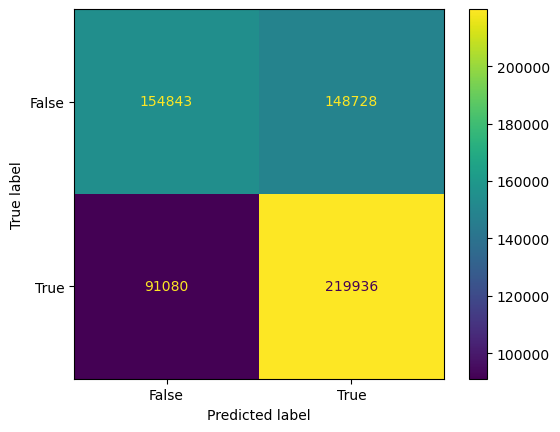

In [66]:
# Confusion matrix for train dataset
confusion_matrix33 = metrics.confusion_matrix(y_train3, y_pred_nn33)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix33, 
                                            display_labels = [False, True])

cm_display.plot()
plt.show()

In [67]:
# Predict the response for test dataset
y_pred_nn3 = np.round(NN.predict(X_test3), 0)

# Model Accuracy, Sensitivity, Specificity, Kappa
print("Accuracy of neural network model 3:", metrics.accuracy_score(y_test3, y_pred_nn3))
print("Sensitivity of neural network model 3:", metrics.recall_score(y_test3, y_pred_nn3))
print("Specificity of neural network model 3:", metrics.recall_score(y_test3, y_pred_nn3, pos_label=0))
print("Kappa of neural network model 3:", metrics.cohen_kappa_score(y_test3, y_pred_nn3))

8232/8232 [==============================] - 11s 1ms/step
Accuracy of neural network model 3: 0.6015983598777501
Sensitivity of neural network model 3: 0.6971353269740487
Specificity of neural network model 3: 0.5033233977987784
Kappa of neural network model 3: 0.2009770328643996


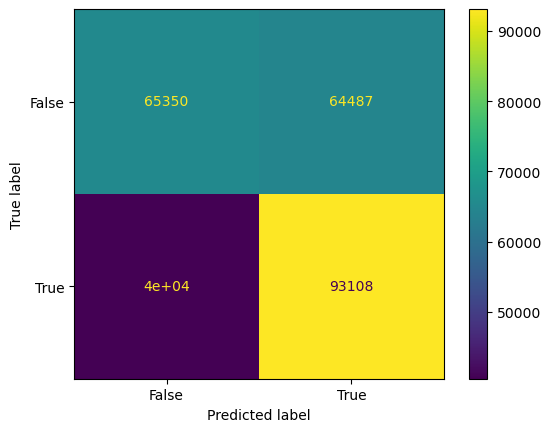

In [68]:
# Confusion matrix for test dataset
confusion_matrix3 = metrics.confusion_matrix(y_test3, y_pred_nn3)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix3, 
                                            display_labels = [False, True])

cm_display.plot()
plt.show()